<a href="https://colab.research.google.com/github/SonawaneAjay/data-science-portfolio/blob/master/Assignment_Car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction Assignment
**Name: Ajay Waman Sonawane**

**Date: 30th July**

## Task 
* Supervised predictive model need to be created which can predict the price column of the Vehicle based upon the various attributes(25) of the Vehicle
* Build the Multivariate Linear regression model, verifying the assumptions of the linear regression hold true
* Models should be evaluated based on the various metrics (Rsquare , Adjusted RSquare)
* Plots need to be constructed to check the assumptions of the Regression
* Model accuracy should be high but at the same time model should not be overfitted
* Model should be built before and after removing the outliers to gauge the impact of outliers on the Behaviour of the Mathematical model
* Feature Selection needs to done, which will tell the impact of feature is increasing the price and which feature has the diminishing impact on the price. Features with their respective importance score needs to be tabulated

In [ ]:
#Importing all necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Reading the given data file
original_data = pd.read_csv('/content/Modified_Car_Price.csv')

## Data Exploration

In [ ]:
original_data.shape

(205, 27)

In [ ]:
original_data.describe()

,Unnamed: 0,symboling,Wheel_Base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,102.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,0.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,51.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,102.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,153.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,204.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         205 non-null    int64  
 1   symboling          205 non-null    int64  
 2   normalized_losses  205 non-null    object 
 3   Fuel_Type          205 non-null    object 
 4   Aspiration         205 non-null    object 
 5   No_of_Doors        205 non-null    object 
 6   Body_Style         205 non-null    object 
 7   Drive_Wheels       205 non-null    object 
 8   Engine_Location    205 non-null    object 
 9   Wheel_Base         205 non-null    float64
 10  Manufacturer       205 non-null    object 
 11  length             205 non-null    float64
 12  width              205 non-null    float64
 13  height             205 non-null    float64
 14  curb_weight        205 non-null    int64  
 15  engine_type        205 non-null    object 
 16  num_of_cylinders   205 non

In [ ]:
original_data.head()

,Unnamed: 0,symboling,normalized_losses,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,Manufacturer,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,gas,std,four,sedan,fwd,front,99.8,audi,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,4,2,164,gas,std,four,sedan,4wd,front,99.4,audi,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
original_data.tail()

,Unnamed: 0,symboling,normalized_losses,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,Manufacturer,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
200,200,-1,95,gas,std,four,sedan,rwd,front,109.1,volvo,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,201,-1,95,gas,turbo,four,sedan,rwd,front,109.1,volvo,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,202,-1,95,gas,std,four,sedan,rwd,front,109.1,volvo,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,203,-1,95,diesel,turbo,four,sedan,rwd,front,109.1,volvo,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,204,-1,95,gas,turbo,four,sedan,rwd,front,109.1,volvo,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


## Data Cleaning
* The first column 'Unnamed:0' is of no use
* Many columns have '?', which needs to be replaced by NaN
* The price column is of object datatype, which is to be converted to float
* THe normalized_losses column is also object which is numeric, so it has converted to float

In [ ]:
#Dropping unwanted column
original_data.drop(['Unnamed: 0'], axis=1, inplace = True)

#Replacing ? with NaN values
original_data.replace('?', np.NaN, inplace=True)

#converting datatype from object to float
original_data.normalized_losses = original_data.normalized_losses.astype('float')
original_data.price = original_data.price.astype('float')

In [ ]:
original_data.isnull().sum()

symboling             0
normalized_losses    41
Fuel_Type             0
Aspiration            0
No_of_Doors           2
Body_Style            0
Drive_Wheels          0
Engine_Location       0
Wheel_Base            0
Manufacturer          0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

##### Filtering only those columns which has nulls values  

In [ ]:
for column in original_data.columns:
    if(original_data[column].isnull().sum() > 0):
        print("{} : {} ".format(column , original_data[column].isnull().sum()))

normalized_losses : 41 
No_of_Doors : 2 
bore : 4 
stroke : 4 
horsepower : 2 
peak_rpm : 2 
price : 4 


In [ ]:
original_data.No_of_Doors.value_counts()

four    114
two      89
Name: No_of_Doors, dtype: int64

In [ ]:
original_data.peak_rpm.value_counts()

5500    37
4800    36
5000    27
5200    23
5400    13
6000     9
5800     7
5250     7
4500     7
4150     5
4200     5
4350     4
4750     4
4400     3
5900     3
5100     3
4250     3
6600     2
5750     1
5300     1
5600     1
4900     1
4650     1
Name: peak_rpm, dtype: int64

In [ ]:
original_data.horsepower.value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
62      6
88      6
101     6
160     6
114     6
145     5
97      5
84      5
82      5
102     5
76      5
86      4
92      4
111     4
123     4
85      3
90      3
152     3
121     3
207     3
73      3
182     3
94      2
176     2
156     2
155     2
161     2
52      2
162     2
112     2
184     2
100     2
56      2
140     1
135     1
60      1
120     1
48      1
72      1
58      1
55      1
115     1
288     1
262     1
143     1
154     1
142     1
78      1
175     1
134     1
106     1
64      1
200     1
Name: horsepower, dtype: int64

In [ ]:
original_data.stroke.value_counts()

3.4     20
3.23    14
3.15    14
3.03    14
3.39    13
2.64    11
3.29     9
3.35     9
3.46     8
3.41     6
3.07     6
3.58     6
3.27     6
3.19     6
3.11     6
3.5      6
3.52     5
3.64     5
3.54     4
3.47     4
3.86     4
2.9      3
3.9      3
2.19     2
3.08     2
4.17     2
3.1      2
2.68     2
2.8      2
2.76     1
3.12     1
3.16     1
2.87     1
2.07     1
2.36     1
3.21     1
Name: stroke, dtype: int64

In [ ]:
original_data.bore.value_counts()

3.62    23
3.19    20
3.15    15
2.97    12
3.03    12
3.46     9
3.31     8
3.78     8
3.43     8
3.27     7
2.91     7
3.39     6
3.58     6
3.05     6
3.54     6
3.01     5
3.7      5
3.35     4
3.74     3
3.59     3
3.17     3
3.8      2
3.33     2
3.47     2
3.63     2
3.94     2
3.24     2
3.5      2
3.13     2
3.6      1
3.08     1
3.76     1
2.54     1
2.92     1
3.34     1
2.99     1
2.68     1
3.61     1
Name: bore, dtype: int64

## Dealing with Null values
* As the price column is the predictive column, we will not replace the null values with mean. Also, they are less in number so we will just remove the rows which has null values
* For numeric column we will use respective mean value to replace null
* For all other object type columns, we will replace the null values with values that appear previous to the row. 

In [ ]:
original_data.drop(original_data[original_data['price'].isnull()].index, inplace = True)

original_data.normalized_losses = original_data.normalized_losses.fillna(original_data.normalized_losses.mean())

original_data.No_of_Doors = original_data.No_of_Doors.fillna('four')

original_data.peak_rpm = original_data.peak_rpm.fillna(method='pad')
original_data.horsepower = original_data.horsepower.fillna(method='pad')
original_data.stroke = original_data.stroke.fillna(method='pad')
original_data.bore = original_data.bore.fillna(method='pad')

In [ ]:
columns = original_data.columns

for col in columns:
    if(original_data[col].isnull().sum() > 0):
        print(col," :: \t\t",original_data[col].isnull().sum())

In [ ]:
original_data.head()

,symboling,normalized_losses,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,Manufacturer,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,122.0,gas,std,two,convertible,rwd,front,88.6,alfa-romero,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,122.0,gas,std,two,hatchback,rwd,front,94.5,alfa-romero,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164.0,gas,std,four,sedan,fwd,front,99.8,audi,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,164.0,gas,std,four,sedan,4wd,front,99.4,audi,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0


In [ ]:
original_data.tail()

,symboling,normalized_losses,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,Manufacturer,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
200,-1,95.0,gas,std,four,sedan,rwd,front,109.1,volvo,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,95.0,gas,turbo,four,sedan,rwd,front,109.1,volvo,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,95.0,gas,std,four,sedan,rwd,front,109.1,volvo,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,95.0,diesel,turbo,four,sedan,rwd,front,109.1,volvo,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470.0
204,-1,95.0,gas,turbo,four,sedan,rwd,front,109.1,volvo,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
original_data.shape

(201, 26)

## Basic Data Exploration
#### Using basic value.counts() to understand the data
#### Also plotting basic count plots for understanding the distribution of the columns

In [ ]:
original_data.Fuel_Type.value_counts()

gas       181
diesel     20
Name: Fuel_Type, dtype: int64

In [ ]:
original_data.Aspiration.value_counts()

std      165
turbo     36
Name: Aspiration, dtype: int64

In [ ]:
original_data.No_of_Doors.value_counts()

four    115
two      86
Name: No_of_Doors, dtype: int64

In [ ]:
original_data.Engine_Location.value_counts()

front    198
rear       3
Name: Engine_Location, dtype: int64

In [ ]:
original_data.Body_Style.value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: Body_Style, dtype: int64

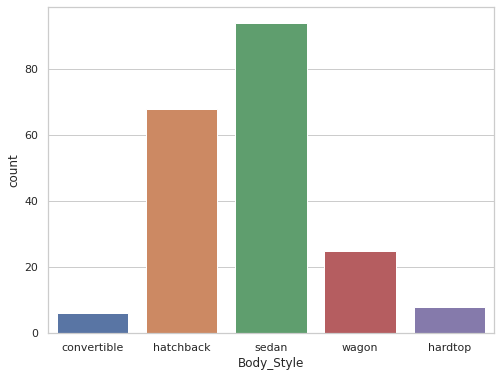

In [ ]:
sns.set(style='whitegrid', palette="deep", rc={"figure.figsize": [8, 6]})
sns.countplot(original_data['Body_Style']);

In [ ]:
original_data.Drive_Wheels.value_counts()

fwd    118
rwd     75
4wd      8
Name: Drive_Wheels, dtype: int64

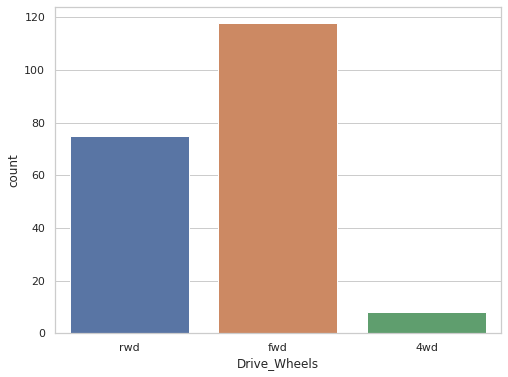

In [ ]:
sns.set(style='whitegrid', palette="deep", rc={"figure.figsize": [8, 6]})
sns.countplot(original_data['Drive_Wheels']);

In [ ]:
original_data.Manufacturer.value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
alfa-romero       3
jaguar            3
renault           2
isuzu             2
mercury           1
Name: Manufacturer, dtype: int64

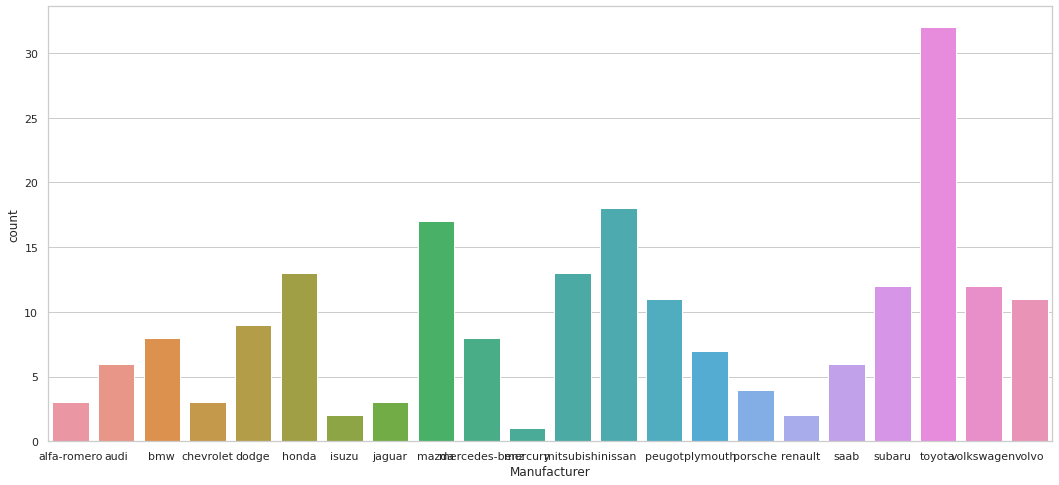

In [ ]:
sns.set(style='whitegrid', palette="deep", rc={"figure.figsize": [18, 8]})
sns.countplot(original_data['Manufacturer']);

In [ ]:
original_data.fuel_system.value_counts()

mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuel_system, dtype: int64

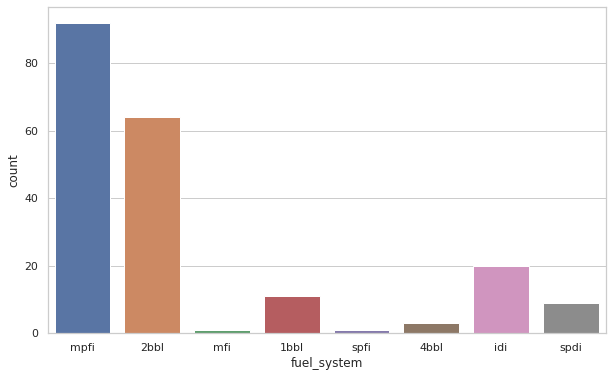

In [ ]:
sns.set(style='whitegrid', palette="deep", rc={"figure.figsize": [10, 6]})
sns.countplot(original_data['fuel_system']);

## Data Transformation
#### Using the LabelEncoder, values of all the columns with object type, will be replaced with numbers

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
#List of columns  which are getting transformed
original_data.select_dtypes(include=['object']).columns

Index(['Fuel_Type', 'Aspiration', 'No_of_Doors', 'Body_Style', 'Drive_Wheels',
       'Engine_Location', 'Manufacturer', 'engine_type', 'num_of_cylinders',
       'fuel_system', 'bore', 'stroke', 'horsepower', 'peak_rpm'],
      dtype='object')

In [ ]:
original_data[original_data.select_dtypes(include=['object']).columns] = original_data[original_data.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [ ]:
original_data.head()

,symboling,normalized_losses,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,Manufacturer,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,1,0,1,0,2,0,88.6,0,168.8,64.1,48.8,2548,0,2,130,5,23,4,9.0,5,10,21,27,13495.0
1,3,122.0,1,0,1,0,2,0,88.6,0,168.8,64.1,48.8,2548,0,2,130,5,23,4,9.0,5,10,21,27,16500.0
2,1,122.0,1,0,1,2,2,0,94.5,0,171.2,65.5,52.4,2823,4,3,152,5,1,27,9.0,20,10,19,26,16500.0
3,2,164.0,1,0,0,3,1,0,99.8,1,176.6,66.2,54.3,2337,2,2,109,5,13,24,10.0,2,16,24,30,13950.0
4,2,164.0,1,0,0,3,0,0,99.4,1,176.6,66.4,54.3,2824,2,1,136,5,13,24,8.0,8,16,18,22,17450.0


In [ ]:
original_data.tail()

,symboling,normalized_losses,Fuel_Type,Aspiration,No_of_Doors,Body_Style,Drive_Wheels,Engine_Location,Wheel_Base,Manufacturer,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
200,-1,95.0,1,0,0,3,2,0,109.1,21,188.8,68.9,55.5,2952,2,2,141,5,35,15,9.5,7,15,23,28,16845.0
201,-1,95.0,1,1,0,3,2,0,109.1,21,188.8,68.8,55.5,3049,2,2,141,5,35,15,8.7,23,14,19,25,19045.0
202,-1,95.0,1,0,0,3,2,0,109.1,21,188.8,68.9,55.5,3012,4,3,173,5,26,7,8.8,13,16,18,23,21485.0
203,-1,95.0,0,1,0,3,2,0,109.1,21,188.8,68.9,55.5,3217,2,3,145,3,6,24,23.0,3,8,26,27,22470.0
204,-1,95.0,1,1,0,3,2,0,109.1,21,188.8,68.9,55.5,3062,2,2,141,5,35,15,9.5,7,15,19,25,22625.0


## Model Building
#### Basic model building code is complied into a single user-defined function which will be called for every iteration
#### Before calling the build_model(), we will divide the data into X_Data and Y_Data
#### The build_model() will print all required values to interpret the model

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

def build_model(x_data, y_data):

    #Spliting the dataset into train and test usign 80:20 ratio
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 101)

    #printing dimentions of splitted dataset
    print("Number of rows and columns in train dataset   : ", x_train.shape)
    print("Number of rows and columns in test dataset    : ", x_test.shape)
    print("----------------------------------------------------------------------------------")
    
    #Setting the required parameters using the dataset dimensions
    k = x_train.shape[1]       #number of columns in train dataset
    n = x_train.shape[0]       #number of rows in train dataset

    #creating reg object for model building
    reg = linear_model.LinearRegression()
    reg.fit(x_train, y_train)

    #Printing beta values i.e. B0, B1, B2, B3, ...., Bn 
    df_feature_score  = pd.DataFrame({"Feature" : x_train.columns , "Score": list(reg.coef_ ) } )
    print("\nBeta values of all columns : \n", df_feature_score)
    print("\nBeta 0 value : ", reg.intercept_)
    print("----------------------------------------------------------------------------------")

    #Calculating R Square value
    R_Square = reg.score(x_train, y_train)
    Adjusted_R_Square = 1 - (1 - R_Square) * (n - 1) / (n - k - 1)

    #Printing calculated values
    print("\nR square            : ", round((R_Square * 100), 2), " %")
    print("\nAdjusted R square   : ", round((Adjusted_R_Square * 100), 2), " %")
    print("----------------------------------------------------------------------------------")

    #Predicting values for the test dataset
    predicted_values = reg.predict(x_test)

    #calculating error (Actual_values - Predicted_values)
    error = y_test - predicted_values
    #plotting the error plot for check for normal distribution
    sns.set(style='whitegrid', palette="deep", rc={"figure.figsize": [8, 6]})
    sns.distplot(error).set(xlabel='Error values');
        
    #calculating Mean of error, MSE, RMSE, MAE
    Mean_Error = np.mean(error)
    MSE = np.mean(error * error)
    RMSE = np.power(MSE, .5)
    MAE = np.mean(np.absolute(error))

    #calculating Error Percentange and Accuracy Percentage
    MAPE = np.mean(np.absolute(error/y_test)) * 100
    Accuracy = 100 - MAPE

    #printing all the calculated values
    print("\nMean value of Error                   : ", round(Mean_Error,2))
    print("\nMean Square Error - MSE               : ", round(MSE,2))
    print("\nRoot Mean Square Error - RMSE         : ", round(RMSE,2))
    print("\nMean Absolute Error - MAE             : ", round(MAE,2))
    print("----------------------------------------------------------------------------------")
    print("\nMean Absolute Percentage Error - MAPE : ", round(MAPE,2), " %")
    print("\nAccuracy percentage                   : ", round(Accuracy,2), " %")
    print("----------------------------------------------------------------------------------")

In [ ]:
original_data.shape

(201, 26)

First Iteration : 
----------------------------------------------------------------------------------
Number of rows and columns used for prediction  :  (201, 25)
----------------------------------------------------------------------------------
Number of rows and columns in train dataset   :  (160, 25)
Number of rows and columns in test dataset    :  (41, 25)
----------------------------------------------------------------------------------

Beta values of all columns : 
               Feature         Score
0           symboling     99.274428
1   normalized_losses     -9.177960
2           Fuel_Type -11302.068244
3          Aspiration    518.235658
4         No_of_Doors   -514.398491
5          Body_Style  -1090.489318
6        Drive_Wheels   1295.346958
7     Engine_Location  11550.563985
8          Wheel_Base     97.158824
9        Manufacturer   -179.465477
10             length      7.374154
11              width    626.423109
12             height    309.183568
13        curb_wei

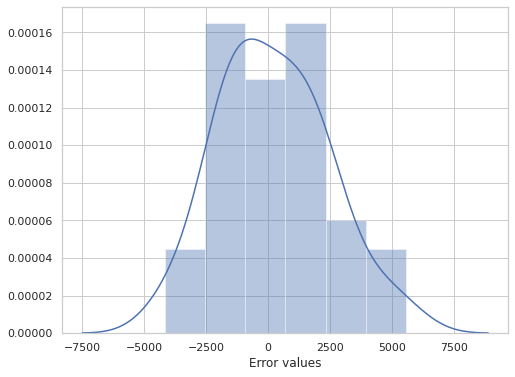

In [ ]:
#First Iteration of model building
print("First Iteration : ")
print("----------------------------------------------------------------------------------")

#preparing dataset as dependent(y_data) and independent(x_data)
x_data = original_data.iloc[:, 0:25]
y_data = original_data.iloc[:, -1]
print("Number of rows and columns used for prediction  : ", x_data.shape)
print("----------------------------------------------------------------------------------")

#calling user defined function 
build_model(x_data, y_data)

## Removing Outliers

In [ ]:
#For removing outliers
def remove_outliers(dataframe, column, k=2):   
    mean = dataframe[column].mean()
    global modified_dataframe      
    standarDeviation = dataframe[column].std()    
    final_list = [x for x in dataframe[column] if (x > mean - k * standarDeviation)]
    final_list = [x for x in final_list if (x < mean + k * standarDeviation)]       
    modified_dataframe = dataframe.loc[dataframe[column].isin(final_list)]      


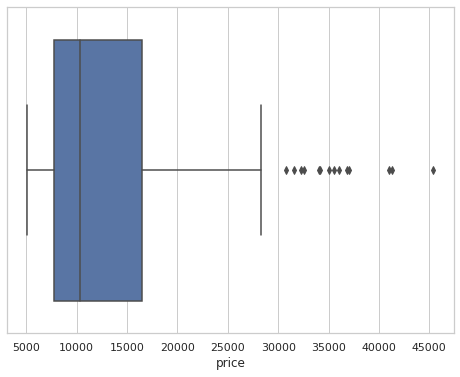

In [ ]:
sns.boxplot(x=original_data['price'])

Total outliers removed :  14


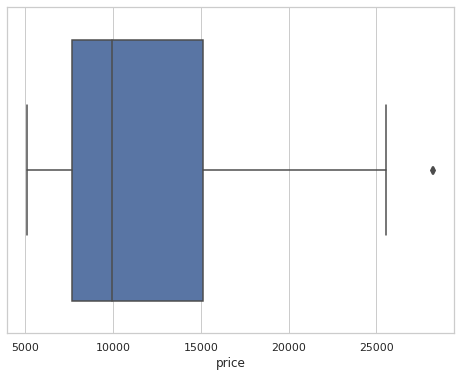

In [ ]:
#Calling the user defined function
remove_outliers(original_data, 'price', k=2)

print("Total outliers removed : ", original_data.shape[0] - modified_dataframe.shape[0])
sns.boxplot(x=modified_dataframe['price'])

In [ ]:
modified_dataframe.shape

(187, 26)

Second Iteration : 
----------------------------------------------------------------------------------
Number of rows and columns used for prediction  :  (187, 25)
----------------------------------------------------------------------------------
Number of rows and columns in train dataset   :  (149, 25)
Number of rows and columns in test dataset    :  (38, 25)
----------------------------------------------------------------------------------

Beta values of all columns : 
               Feature         Score
0           symboling  4.752760e+01
1   normalized_losses  4.741952e+00
2           Fuel_Type  9.453998e+03
3          Aspiration  1.731100e+03
4         No_of_Doors -8.135323e+02
5          Body_Style -4.871947e+02
6        Drive_Wheels  1.595652e+03
7     Engine_Location -2.948752e-12
8          Wheel_Base  7.689566e+00
9        Manufacturer -1.436593e+02
10             length -4.469952e+01
11              width  6.357641e+02
12             height  2.777962e+02
13        curb_we

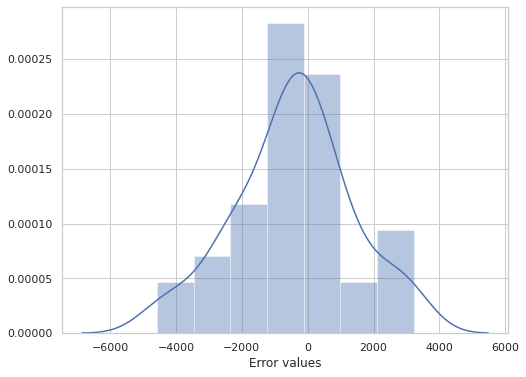

In [ ]:
#Second Iteration of model building
print("Second Iteration : ")
print("----------------------------------------------------------------------------------")

#preparing dataset as dependent(y_data) and independent(x_data)
x_data = modified_dataframe.iloc[:, 0:25]
y_data = modified_dataframe.iloc[:, -1]
print("Number of rows and columns used for prediction  : ", x_data.shape)
print("----------------------------------------------------------------------------------")

#calling user defined function 
build_model(x_data, y_data)

## Feature Selection 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

dtc  = DecisionTreeClassifier()

In [ ]:
RFE_dtc = RFE(dtc , 15)
RFE_dtc.fit(x_data , y_data)

RFE_dtc.support_

array([ True,  True, False, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False,  True, False,  True,  True,  True,  True])

In [ ]:
df_feature  = pd.DataFrame({"Feature" : x_data.columns , "Significant Status": list(RFE_dtc.support_) } )
print(df_feature)

              Feature  Significant Status
0           symboling                True
1   normalized_losses                True
2           Fuel_Type               False
3          Aspiration               False
4         No_of_Doors                True
5          Body_Style                True
6        Drive_Wheels               False
7     Engine_Location               False
8          Wheel_Base                True
9        Manufacturer                True
10             length                True
11              width                True
12             height                True
13        curb_weight                True
14        engine_type               False
15   num_of_cylinders               False
16        engine_size               False
17        fuel_system               False
18               bore               False
19             stroke                True
20  compression_ratio               False
21         horsepower                True
22           peak_rpm             

In [ ]:
print(df_feature[df_feature['Significant Status'] == True])

              Feature  Significant Status
0           symboling                True
1   normalized_losses                True
4         No_of_Doors                True
5          Body_Style                True
8          Wheel_Base                True
9        Manufacturer                True
10             length                True
11              width                True
12             height                True
13        curb_weight                True
19             stroke                True
21         horsepower                True
22           peak_rpm                True
23           city_mpg                True
24        highway_mpg                True


In [ ]:
df_feature[df_feature['Significant Status'] == True].index

Int64Index([0, 1, 4, 5, 8, 9, 10, 11, 12, 13, 19, 21, 22, 23, 24], dtype='int64')

Third Iteration of model building ------------------------------------------------
Number of rows and columns used for prediction  :  (187, 15)
----------------------------------------------------------------------------------
Number of rows and columns in train dataset   :  (149, 15)
Number of rows and columns in test dataset    :  (38, 15)
----------------------------------------------------------------------------------

Beta values of all columns : 
               Feature       Score
0           symboling -201.104550
1   normalized_losses   11.174627
2         No_of_Doors -330.578195
3          Body_Style -654.143469
4          Wheel_Base   32.249484
5        Manufacturer -129.961928
6              length  -38.851708
7               width  735.534463
8              height   95.626283
9         curb_weight    7.051613
10             stroke  -42.379939
11         horsepower  -62.971572
12           peak_rpm  -67.303468
13           city_mpg  -49.579430
14        highway_mpg   60.3871

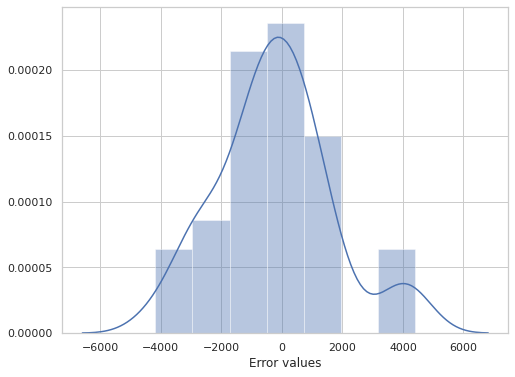

In [ ]:
#Third Iteration of model building
print("Third Iteration of model building ------------------------------------------------")

#preparing dataset as dependent(y_data) and independent(x_data)
x_data = modified_dataframe.iloc[:, [0, 1, 4, 5, 8, 9, 10, 11, 12, 13, 19, 21, 22, 23, 24]]
y_data = modified_dataframe.iloc[:, -1]
print("Number of rows and columns used for prediction  : ", x_data.shape)
print("----------------------------------------------------------------------------------")

#calling user defined function 
build_model(x_data, y_data)

# Conclusion
1. Initially we removed null values from the dataset, using various techniques like mean, padding, etc.
2. With the data we transformed all the object types, using LabelEncoder.
3. Later with all the changes, we did basic data exploration using value counts and basic count graphs.
4. Created a model, to predict the price records using all the independent columns. The model predictions were good and the metrics we got from the first iteration are: 
    * R square            :  90.63  %
    * Adjusted R square   :  88.89  %
    * Accuracy percentage :  82.46  % 
5. Then removed some outliers from the our predicted column i.e. price and recreated the model, to predict the price records using all the independent columns. The model predictions improved even more and the metrics we got from the second iteration are: 
    * R square            :  87.47  %
    * Adjusted R square   :  84.92  %
    * Accuracy percentage :  87.64  % 
6. Finally, did feature selection on the modified dataset(i.e. after removing the outliers) where only top 15 significant columns were considered for building model. Here the model predictions improved with very less margin. The metrics we got from the thrid iteration are:
    * R square            :  84.57  %
    * Adjusted R square   :  82.83  %
    * Accuracy percentage :  87.71  % 

**Thus, we found that parameters such as Manufacturer, curb weight,  Body_Style, horsepower, highway_mpg are some of the parameters, which show strong association for predicting the car price.**
